In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load dataset
df = pd.read_csv('original.csv')

# Hapus kolom kosong yang tidak dibutuhkan
df = df.drop(columns=['Unnamed: 20', 'Unnamed: 21'])

# Tampilkan 5 baris pertama
df.head()

,Gender,Age,POLAR4 Quintile,POLAR3 Quintile,Adult HE 2001 Quintile,Adult HE 2011 Quintile,TUNDRA MSOA Quintile,TUNDRA LSOA Quintile,Gaps GCSE Quintile,Gaps GCSE Ethnicity Quintile,Uni Connect target ward,attending from home?,distance to university (km),Count of Module Area Logins,Total Hours in Module Area,% of Average Hours in Module Area,# of presence,# of Absence,Percent Attended,"label (fail=1, pass=0)"
0,0.0,38.0,5.0,5.0,4.0,5.0,4.0,4.0,5.0,5.0,0.0,1.0,13.333806,19.0,7.41,0.620767,3.0,9.0,25.000000,1.0
1,0.0,22.0,4.0,2.0,1.0,3.0,4.0,4.0,4.0,5.0,0.0,1.0,15.844126,1.0,0.03,0.002513,0.0,12.0,0.000000,1.0
2,0.0,21.0,4.0,5.0,4.0,5.0,4.0,4.0,5.0,5.0,0.0,1.0,17.706573,25.0,6.14,0.514374,5.0,7.0,41.666667,1.0
3,0.0,25.0,5.0,4.0,3.0,4.0,3.0,3.0,5.0,5.0,0.0,0.0,17.327498,3.0,0.16,0.013404,0.0,12.0,0.000000,1.0
4,0.0,20.0,5.0,4.0,3.0,4.0,3.0,3.0,4.0,4.0,0.0,1.0,0.000000,25.0,4.03,0.337610,11.0,1.0,91.666667,1.0


In [3]:
# Cek apakah ada data kosong
print("Jumlah data kosong per kolom:")
print(df.isnull().sum())

# Cek tipe data
print("\nTipe data tiap kolom:")
print(df.dtypes)

Jumlah data kosong per kolom:
Gender                               7
Age                                  7
POLAR4 Quintile                      7
POLAR3 Quintile                      7
Adult HE 2001 Quintile               7
Adult HE 2011 Quintile               7
TUNDRA MSOA Quintile                 7
TUNDRA LSOA Quintile                 7
Gaps GCSE Quintile                   7
Gaps GCSE Ethnicity Quintile         7
Uni Connect target ward              7
attending from home?                 7
distance to university (km)          7
Count of Module Area Logins          7
Total Hours in Module Area           7
% of Average Hours in Module Area    7
# of presence                        7
# of Absence                         9
Percent Attended                     7
label (fail=1, pass=0)               7
dtype: int64

Tipe data tiap kolom:
Gender                               float64
Age                                  float64
POLAR4 Quintile                      float64
POLAR3 Quintile    

In [4]:
# Hapus baris yang mengandung nilai kosong
df = df.dropna()

# Tampilkan dimensi dataset setelah dibersihkan
print("Jumlah baris dan kolom setelah pembersihan:", df.shape)

# Tampilkan 5 data teratas lagi untuk memastikan
df.head()

Jumlah baris dan kolom setelah pembersihan: (78, 20)


,Gender,Age,POLAR4 Quintile,POLAR3 Quintile,Adult HE 2001 Quintile,Adult HE 2011 Quintile,TUNDRA MSOA Quintile,TUNDRA LSOA Quintile,Gaps GCSE Quintile,Gaps GCSE Ethnicity Quintile,Uni Connect target ward,attending from home?,distance to university (km),Count of Module Area Logins,Total Hours in Module Area,% of Average Hours in Module Area,# of presence,# of Absence,Percent Attended,"label (fail=1, pass=0)"
0,0.0,38.0,5.0,5.0,4.0,5.0,4.0,4.0,5.0,5.0,0.0,1.0,13.333806,19.0,7.41,0.620767,3.0,9.0,25.000000,1.0
1,0.0,22.0,4.0,2.0,1.0,3.0,4.0,4.0,4.0,5.0,0.0,1.0,15.844126,1.0,0.03,0.002513,0.0,12.0,0.000000,1.0
2,0.0,21.0,4.0,5.0,4.0,5.0,4.0,4.0,5.0,5.0,0.0,1.0,17.706573,25.0,6.14,0.514374,5.0,7.0,41.666667,1.0
3,0.0,25.0,5.0,4.0,3.0,4.0,3.0,3.0,5.0,5.0,0.0,0.0,17.327498,3.0,0.16,0.013404,0.0,12.0,0.000000,1.0
4,0.0,20.0,5.0,4.0,3.0,4.0,3.0,3.0,4.0,4.0,0.0,1.0,0.000000,25.0,4.03,0.337610,11.0,1.0,91.666667,1.0


In [5]:
# Pisahkan fitur (X) dan label (y)
X = df.drop(columns=["label (fail=1, pass=0)"])
y = df["label (fail=1, pass=0)"]

# Tampilkan dimensi X dan y 
print("Dimensi fitur (X):", X.shape)
print("Dimensi label (y):", y.shape)

Dimensi fitur (X): (78, 19)
Dimensi label (y): (78,)


In [6]:
# Bagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan ukuran data
print("Jumlah data latih:", X_train.shape[0])
print("Jumlah data uji:", X_test.shape[0])

Jumlah data latih: 62
Jumlah data uji: 16


In [7]:
# Latih model Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Evaluasi akurasi pada data uji
y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.6875


In [8]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[9 4]
 [1 2]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.69      0.78        13
         1.0       0.33      0.67      0.44         3

    accuracy                           0.69        16
   macro avg       0.62      0.68      0.61        16
weighted avg       0.79      0.69      0.72        16



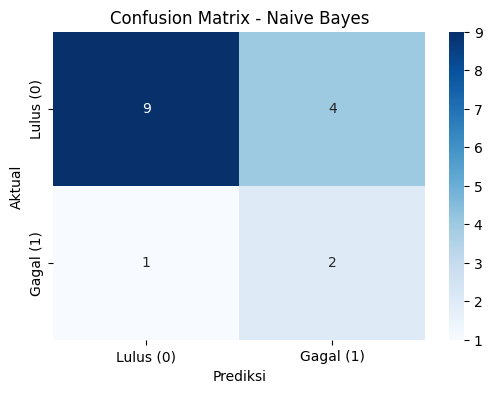

In [9]:
# Buat confusion matrix dari data prediksi
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Lulus (0)', 'Gagal (1)'], yticklabels=['Lulus (0)', 'Gagal (1)'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

In [10]:
plt.savefig("confusion_matrix.png")

<Figure size 640x480 with 0 Axes>

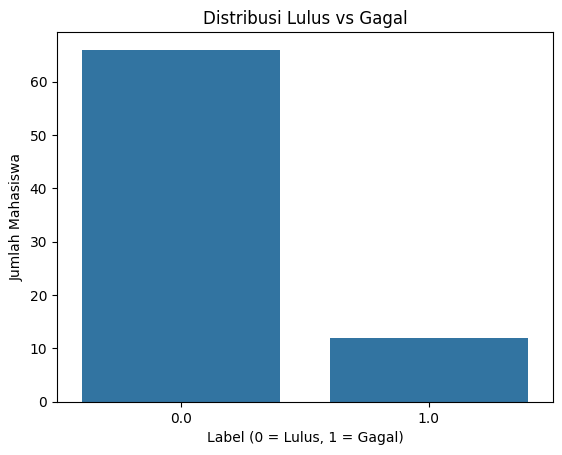

In [11]:
sns.countplot(x='label (fail=1, pass=0)', data=df)
plt.title("Distribusi Lulus vs Gagal")
plt.xlabel("Label (0 = Lulus, 1 = Gagal)")
plt.ylabel("Jumlah Mahasiswa")
plt.show()

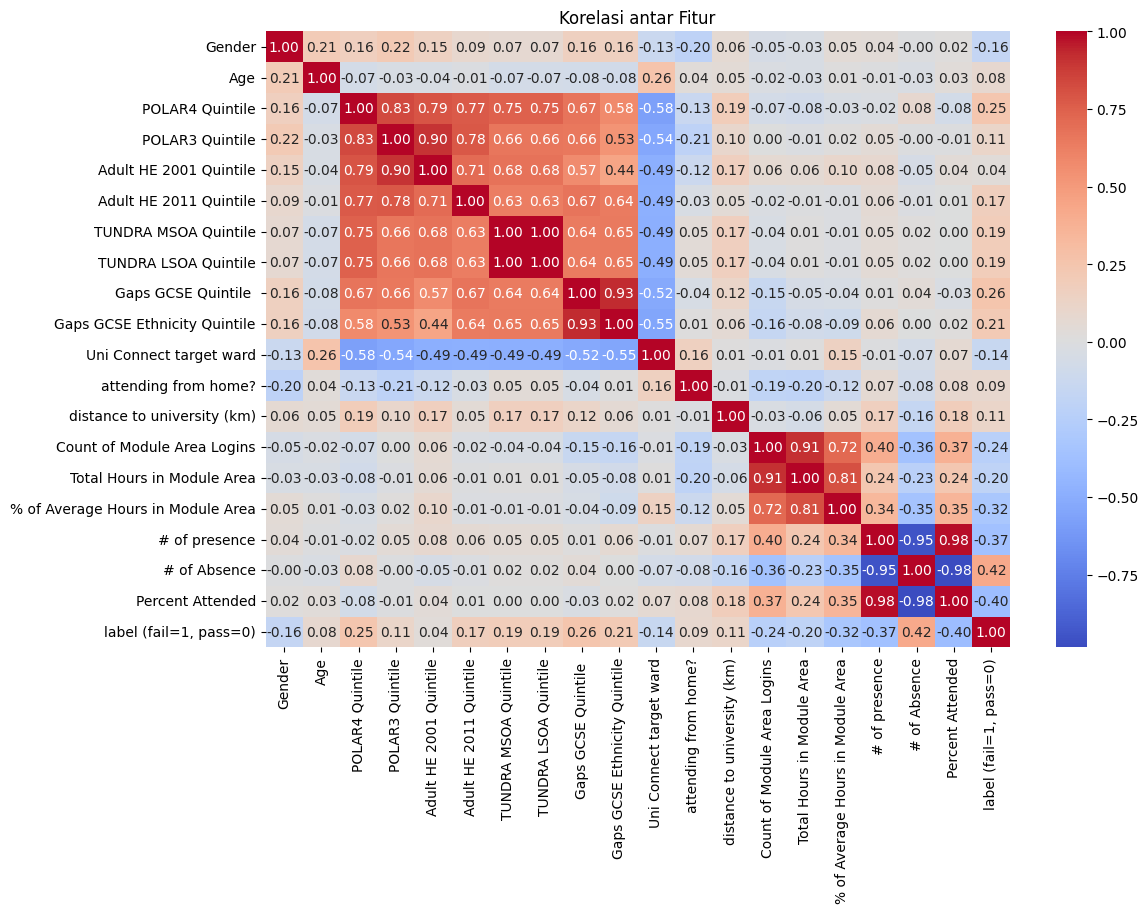

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelasi antar Fitur")
plt.show()

In [ ]:
# Contoh: [Gender, Age, POLAR4, ..., Percent Attended]
data_baru = [[0.0, 22.0, 4.0, 2.0, 1.0, 3.0, 4.0, 4.0, 4.0, 5.0,
              0.0, 1.0, 15.84, 1.0, 0.03, 0.0025, 0.0, 12.0, 0.0]]

prediksi_baru = model.predict(data_baru)
print("Prediksi kelulusan:", "Gagal" if prediksi_baru[0] == 1 else "Lulus")

In [ ]:
# Kesimpulan:
# - Dataset yang digunakan berasal dari Mendeley dengan 78 data bersih
# - Model klasifikasi menggunakan Naive Bayes
# - Akurasi model: 68.75%
# - Recall untuk deteksi mahasiswa gagal: 67%
# - Model ini masih dapat dikembangkan lebih lanjut dengan balancing data, atau algoritma lain
